In [2]:
import networkx as nx
import json

In [15]:
def create_deck_graphs(decklists, full_graph):
    deck_graphs = {}
    
    for idx, deck in enumerate(decklists):
        deck_graph = nx.DiGraph()
        deck_card_ids = set(card_id for card_dict in deck for card_id in card_dict.keys())
        
        copies_mapping = {}
        for card_dict in deck:
            for card_id, count in card_dict.items():
                copies_mapping[card_id] = count

        for card_id in deck_card_ids:
            if card_id in full_graph.nodes:
                node_attrs = full_graph.nodes[card_id].copy()
                node_attrs["copies"] = copies_mapping.get(card_id, 0)
                deck_graph.add_node(card_id, **node_attrs)
        
        for source, target, data in full_graph.edges(data=True):
            if source in deck_card_ids and target in deck_card_ids:
                deck_graph.add_edge(source, target, **data)
        
        print(f"Deck {idx} has {len(deck_graph.nodes)} nodes and {len(deck_graph.edges)} edges")
        deck_graphs[f"deck_{idx}"] = deck_graph
    
    return deck_graphs

def export_deck_graphs(deck_graphs):
    for deck_name, graph in deck_graphs.items():
        nx.write_graphml(graph, f"graphs/deck-lists/{deck_name}.graphml")

In [16]:
with open("data/one_piece_deck_lists.json", "r") as f:
    decklists = json.load(f)

# read complete synergy graph
full_graph = nx.read_graphml("graphs/card_synergies.graphml")

KeyboardInterrupt: 

Deck 0 has 16 nodes and 57 edges
Deck 1 has 19 nodes and 19 edges
Deck 2 has 16 nodes and 58 edges
Deck 3 has 16 nodes and 16 edges
Deck 4 has 17 nodes and 17 edges
Deck 5 has 17 nodes and 58 edges
Deck 6 has 14 nodes and 24 edges
Deck 7 has 15 nodes and 53 edges
Deck 8 has 16 nodes and 29 edges
Deck 9 has 16 nodes and 18 edges
Deck 10 has 17 nodes and 42 edges
Deck 11 has 17 nodes and 58 edges
Deck 12 has 17 nodes and 92 edges
Deck 13 has 18 nodes and 80 edges
Deck 14 has 17 nodes and 72 edges
Deck 15 has 15 nodes and 15 edges
Deck 16 has 17 nodes and 17 edges
Deck 17 has 16 nodes and 56 edges
Deck 18 has 18 nodes and 96 edges
Deck 19 has 17 nodes and 24 edges
Deck 20 has 16 nodes and 32 edges
Deck 21 has 17 nodes and 49 edges
Deck 22 has 17 nodes and 17 edges
Deck 23 has 19 nodes and 65 edges
Deck 24 has 17 nodes and 18 edges
Deck 25 has 17 nodes and 18 edges
Deck 26 has 19 nodes and 26 edges
Deck 27 has 16 nodes and 17 edges
Deck 28 has 20 nodes and 28 edges
Deck 29 has 17 nodes and

AttributeError: module 'networkx' has no attribute 'info'

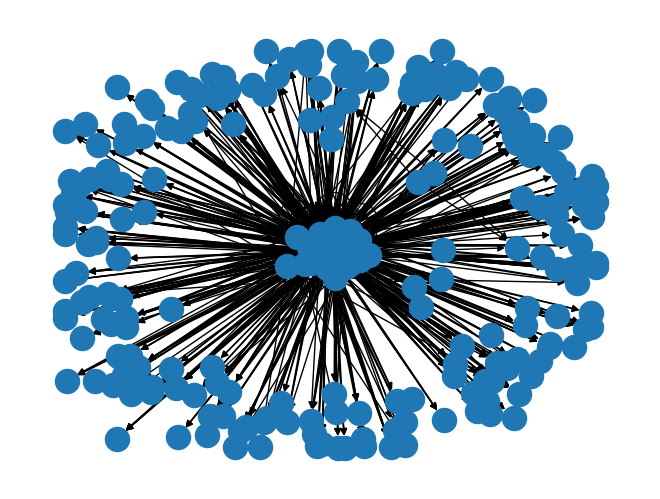

In [ ]:
deck_graphs = create_deck_graphs(decklists, full_graph)

In [14]:
export_deck_graphs(deck_graphs)